In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=1)

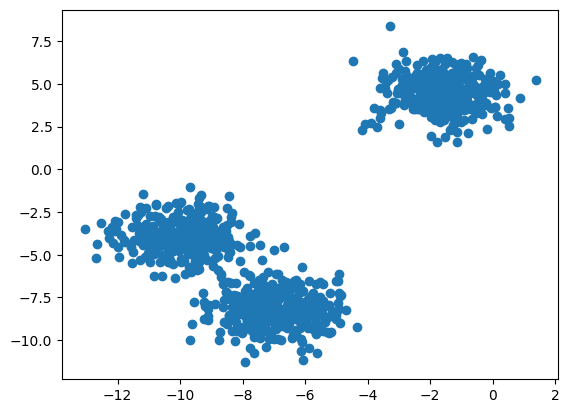

In [3]:
plt.scatter(X[:, 0], X[:, 1])

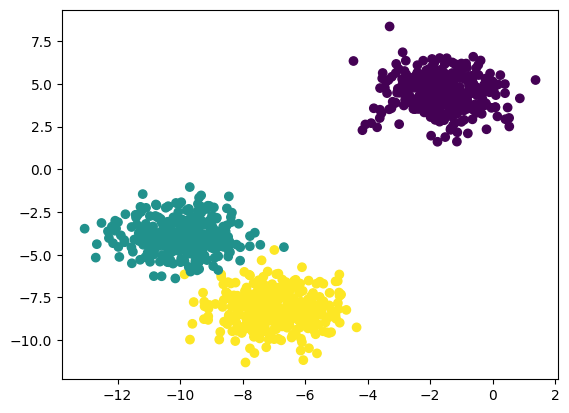

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
X_train.shape, X_test.shape

((700, 2), (300, 2))

In [7]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X_train)

KMeans(n_clusters=3)

In [8]:
y_pred = model.predict(X_train)

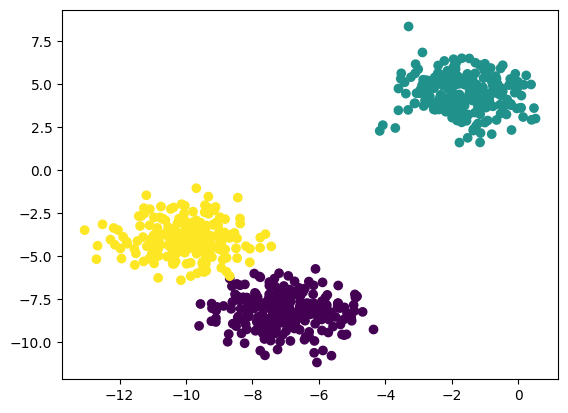

In [9]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_pred)

In [10]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train, model.labels_)

np.float64(0.7179451230427786)

In [11]:
model.labels_

array([1, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 1,
       0, 1, 1, 0, 2, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 2,
       2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 2, 2, 0, 1, 1, 1,
       1, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2,
       2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 0, 0,
       1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0,
       1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2,
       0, 2, 2, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 1,
       2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0,
       1, 1, 2, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2,
       2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 0, 1,

In [12]:
model.inertia_ #gives wcss distance

1405.68005178494

In [13]:
#how to select k(centroid) >> elbow method

In [14]:
wcss = []
for k in range(1,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

In [15]:
wcss #wcss is decreasing as k value increases

[29004.511743610456,
 4501.242392684225,
 1405.68005178494,
 1237.8796031636318,
 1121.8898342269422,
 950.5780101802644,
 841.5768982166404,
 723.2873872098473,
 678.3718966299532]

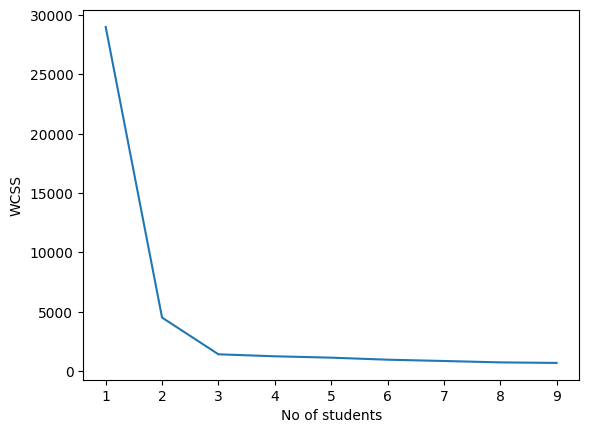

In [16]:
# elbow curve
plt.plot(range(1, 10), wcss)
plt.xticks(range(1, 10))
plt.xlabel("No of students")
plt.ylabel("WCSS")
plt.show()

In [17]:
#based on the plot the optimal no. of k/centroid should be 3

In [18]:
from kneed import KneeLocator

In [19]:
k1 = KneeLocator(range(1,10), wcss, curve='convex', direction='decreasing')

In [20]:
k1.elbow

np.int64(2)

In [21]:
silhouette_coeff = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X_train)
  score = silhouette_score(X_train, kmeans.labels_)
  silhouette_coeff.append(score)

In [22]:
silhouette_coeff

[np.float64(0.7674998364431159),
 np.float64(0.7179451230427786),
 np.float64(0.5810035900170022),
 np.float64(0.4058967586894554),
 np.float64(0.43147864221642634),
 np.float64(0.33178009272812004),
 np.float64(0.32950609373516965),
 np.float64(0.30971853070446154)]